In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
!cp -r "/content/gdrive/My Drive/Colab Notebooks/music-compression/" ./

^C


In [2]:
%cd music-compression

/content/music-compression


In [3]:
!pip install pydub

In [0]:
import torch
import numpy as np

from runner.train_classifier import TrainerClassifier

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [0]:
#!rm 'data/sample/fma_xs/train/099134.mp3'

In [0]:
#from utils.data_helper import stat_all_files
#stat_all_files('data/sample/fma_xs/')

In [0]:
cuda_flag = True

In [17]:
trainer = TrainerClassifier('data/sample/fma_xs/',
                  '/content/gdrive/My Drive/Colab Notebooks/music-compression/model_checkpoints/cnn_classifier_v1', 
                  batch_size=100, 
                  load_from_disk=False, 
                  cuda=cuda_flag)

copying params from  encoder_model.conv1.weight
copying params from  encoder_model.conv1.bias
copying params from  encoder_model.conv2.weight
copying params from  encoder_model.conv2.bias
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.001
    lr: 0.001
    weight_decay: 1e-05
)


In [18]:
trainer.train(num_epochs=500)

Epoch:1, Loss:2.0321
Epoch:11, Loss:1.8563
Epoch:21, Loss:1.6345
Epoch:31, Loss:1.7724
Epoch:41, Loss:1.6257
Epoch:51, Loss:1.5142
Epoch:61, Loss:1.5638
Epoch:71, Loss:1.5144
Epoch:81, Loss:1.5159
Epoch:91, Loss:1.5032
Epoch:101, Loss:1.4776
Epoch:111, Loss:1.3281
Epoch:121, Loss:1.3670
Epoch:131, Loss:1.3717
Epoch:141, Loss:1.4615
Epoch:151, Loss:1.4126
Epoch:161, Loss:1.4018
Epoch:171, Loss:1.4617
Epoch:181, Loss:1.2808
Epoch:191, Loss:1.3138
Epoch:201, Loss:1.3433
Epoch:211, Loss:1.3399
Epoch:221, Loss:1.2540
Epoch:231, Loss:1.3834
Epoch:241, Loss:1.1808
Epoch:251, Loss:1.2612
Epoch:261, Loss:1.5014
Epoch:271, Loss:1.1030
Epoch:281, Loss:1.4093
Epoch:291, Loss:1.4249
Epoch:301, Loss:1.4201
Epoch:311, Loss:1.1396
Epoch:321, Loss:1.2012
Epoch:331, Loss:1.2429
Epoch:341, Loss:1.3675
Epoch:351, Loss:1.3660
Epoch:361, Loss:1.1039
Epoch:371, Loss:1.3881
Epoch:381, Loss:1.1131
Epoch:391, Loss:1.0699
Epoch:401, Loss:1.2275
Epoch:411, Loss:1.1238
Epoch:421, Loss:1.0803
Epoch:431, Loss:1.2669

KeyboardInterrupt: ignored

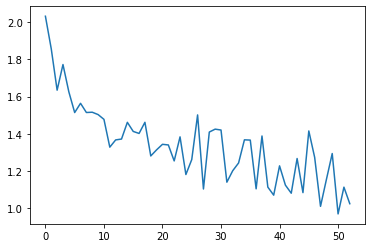

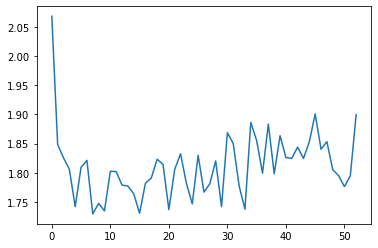

In [19]:
trainer.plot_loss_history(mode='train')
trainer.plot_loss_history(mode='test')

In [20]:
accuracy = trainer.get_accuracy()
print('Accuracy = {}'.format(accuracy))

Accuracy = 0.3626373626373626
